In [1]:
from module import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(context='paper', palette='deep')
sns.set_style('ticks')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2492 non-

## Exploratory data analysis - Europe

#### 1. Sum of cases, deaths, and fatality rate of cholera in countries from Europe

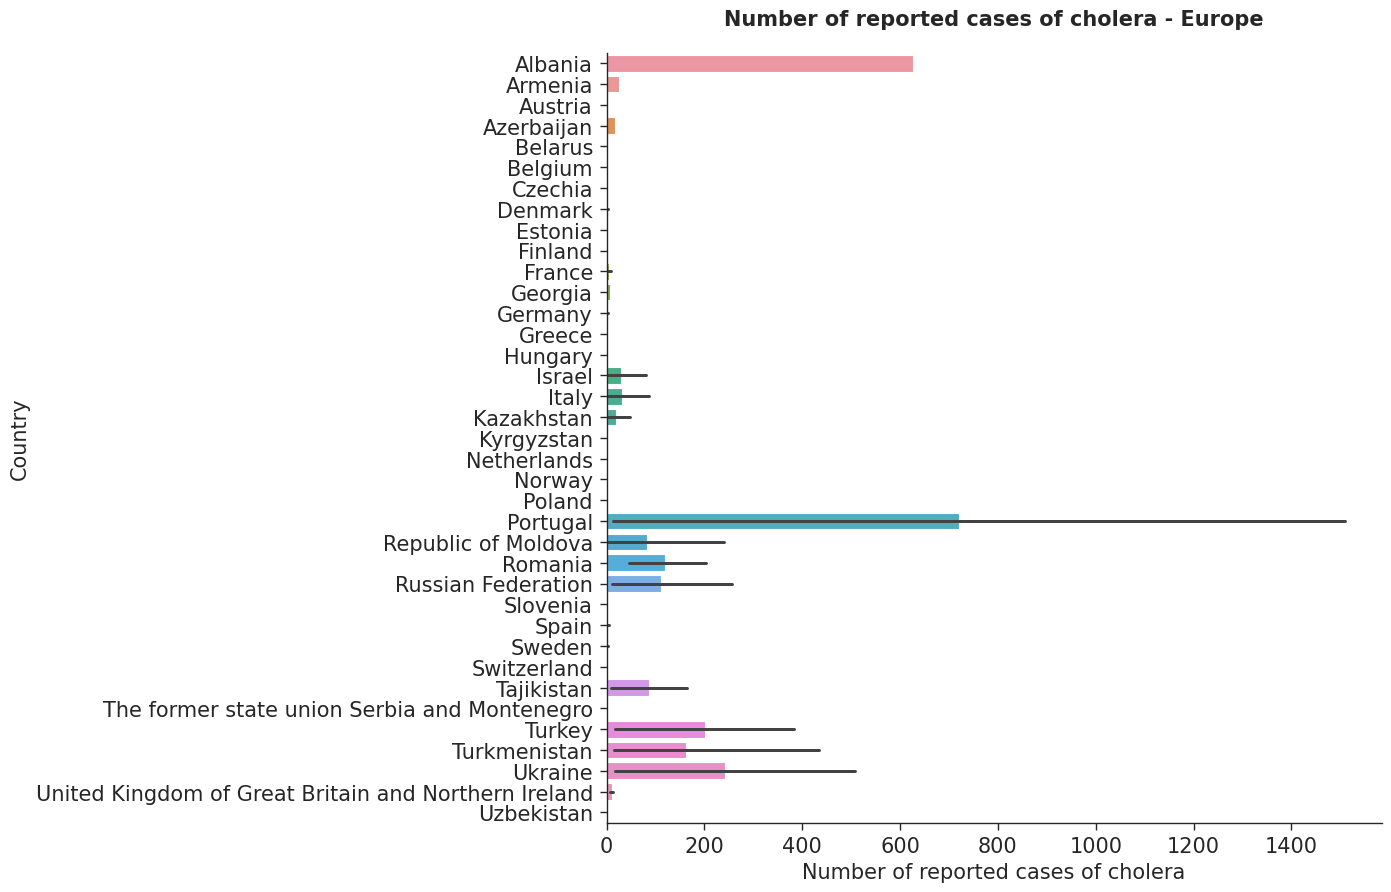

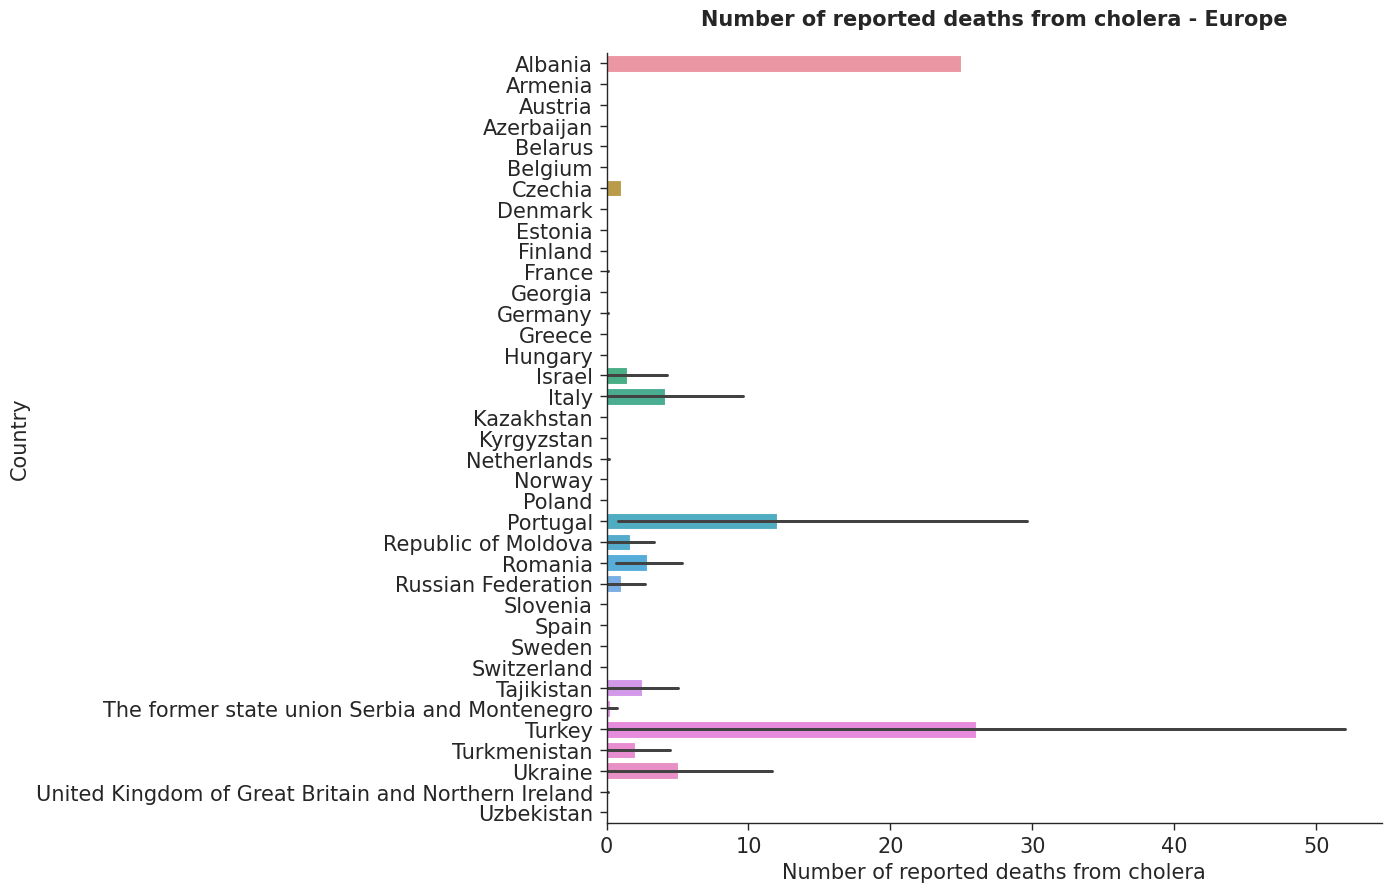

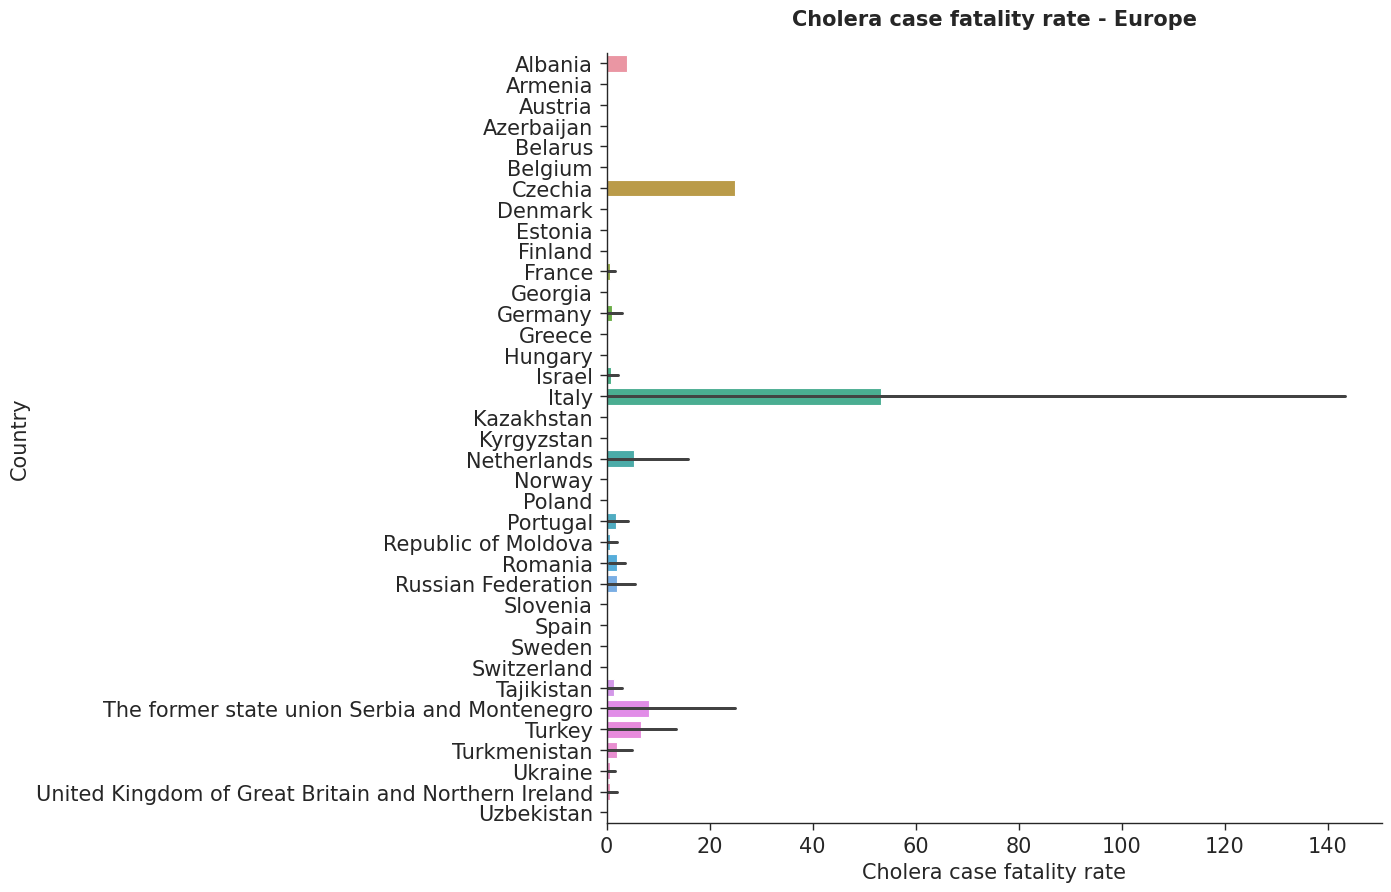

In [2]:
data_europe = data.loc[data['WHO Region']=='Europe']

for c in data_europe.select_dtypes(include=np.number):
  if c == 'Year':
    continue
  else:    
    fig = plt.figure(figsize=(10,10))

    barplot = sns.barplot(
            data=data_europe,
            x=c,
            y='Country',
            dodge=False
        )
    
    barplot.tick_params(
            labelsize=15, 
            pad=5)
    
    sns.despine()

    plt.title(
            f'{c} - Europe',
            fontsize=15,
            fontweight='bold',
            pad = 20)

    plt.ylabel(
            'Country',
            fontsize=15
        )

    plt.xlabel(
            c,
            fontsize=15
        )

    plt.show()
    print('\n')

#### 2. Distribution of cases, deaths, and fatality rate over the years

In [3]:
for i in data_europe.select_dtypes(include=np.number):
    
    if i != 'Year':
        fig = px.scatter(
            data_frame = data_europe,
            x='Year',
            y=i,
            color='Country',
            width=800,
            title=i
        )

        fig.show()

#### 2. Number of cases and deaths per country per year

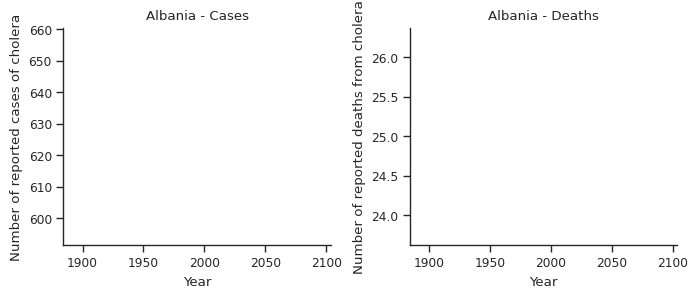

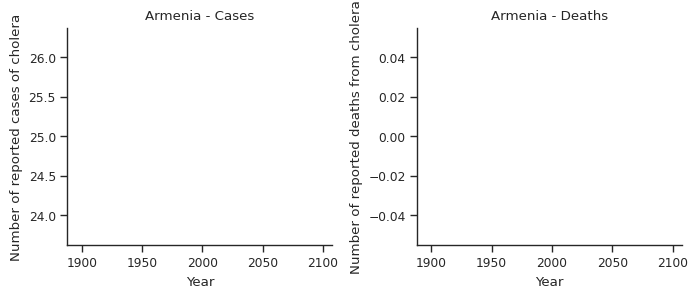

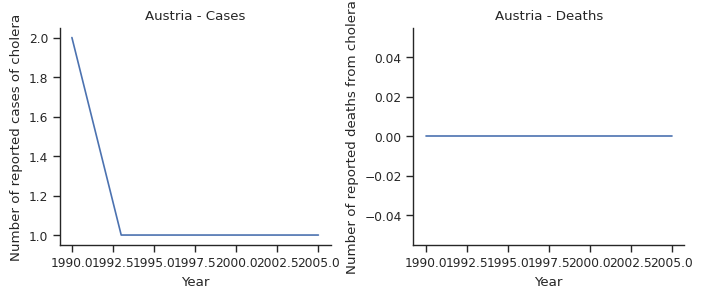

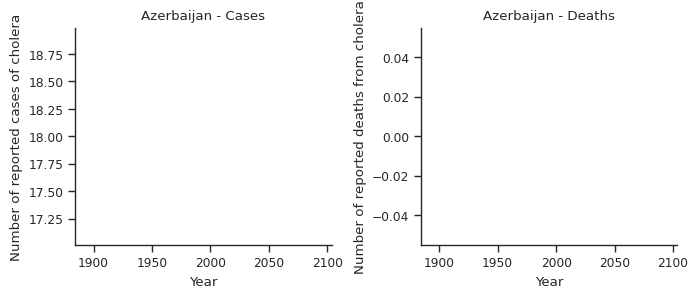

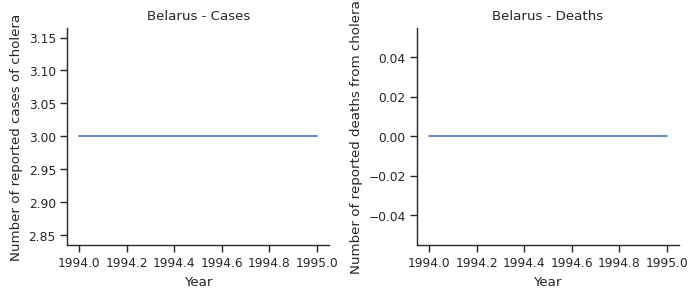

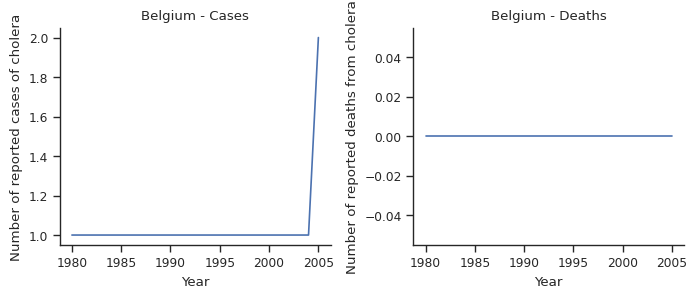

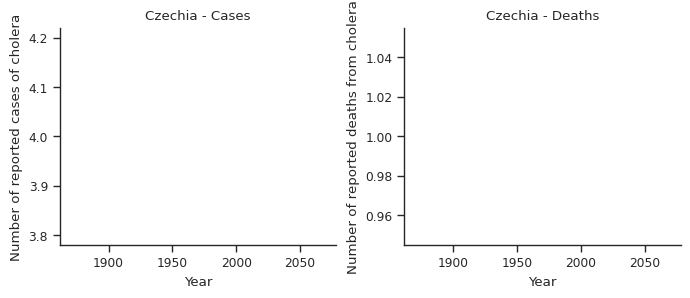

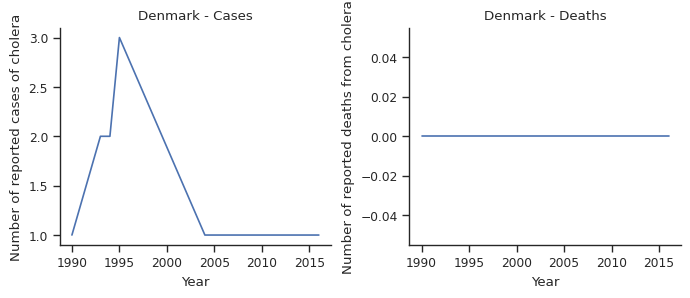

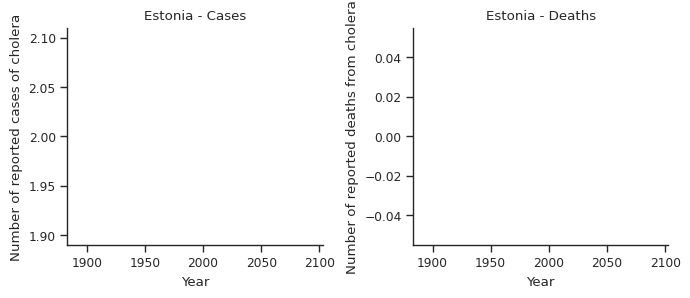

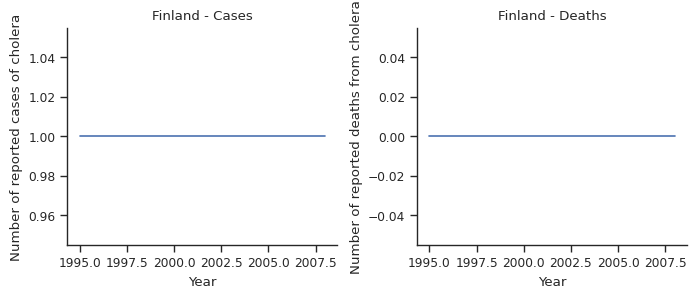

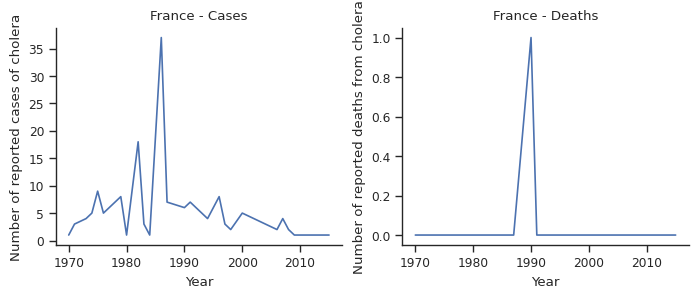

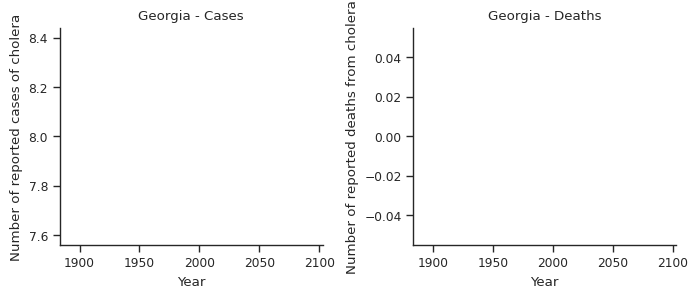

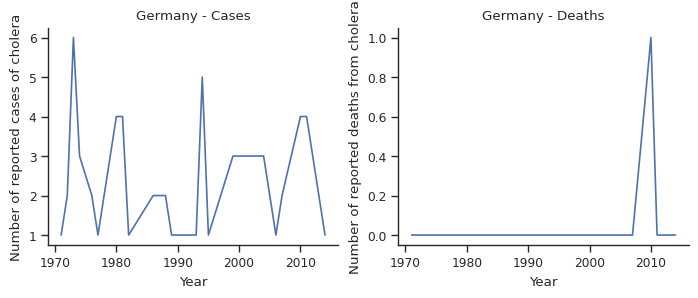

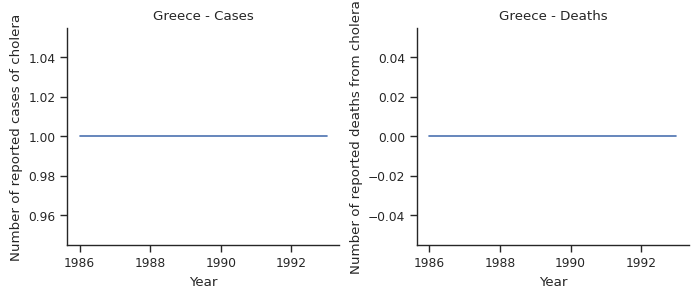

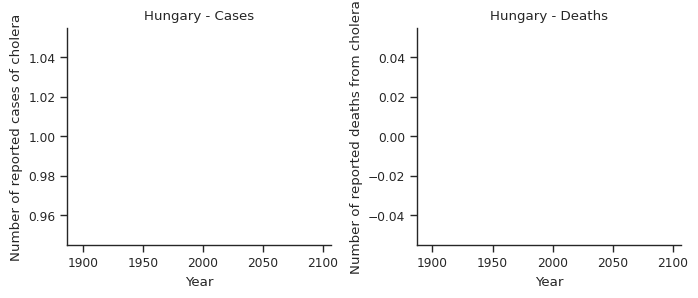

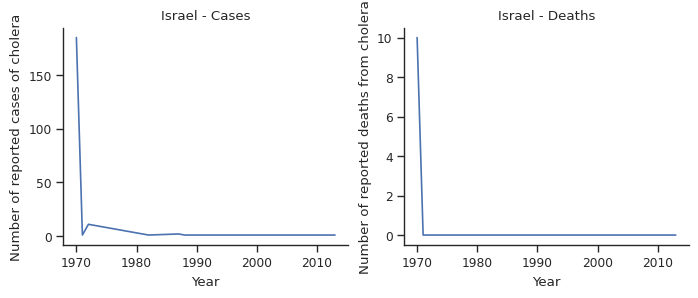

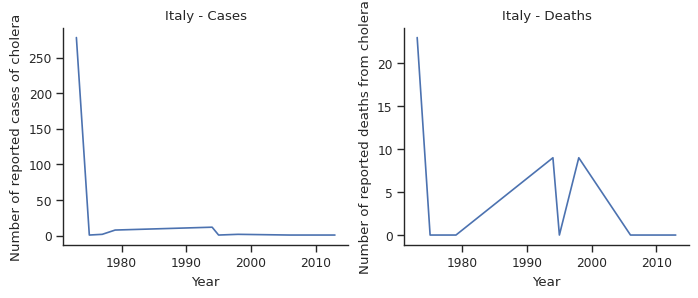

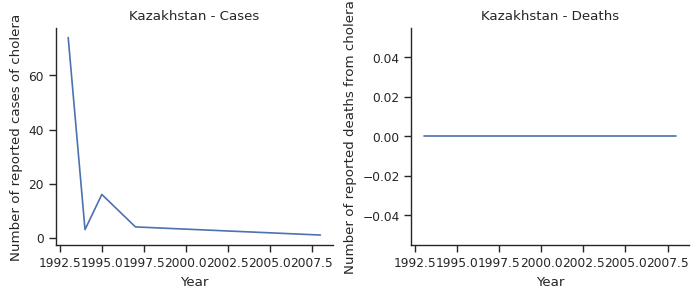

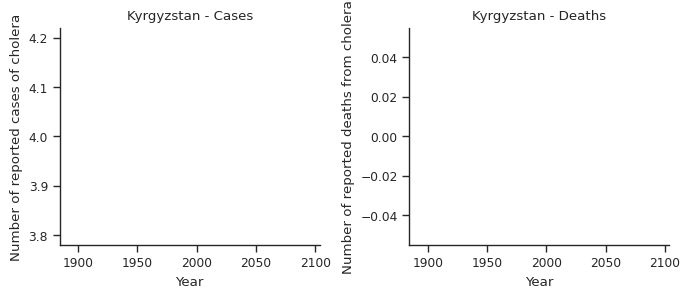

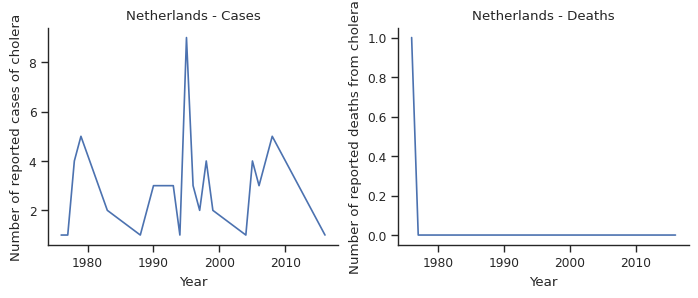

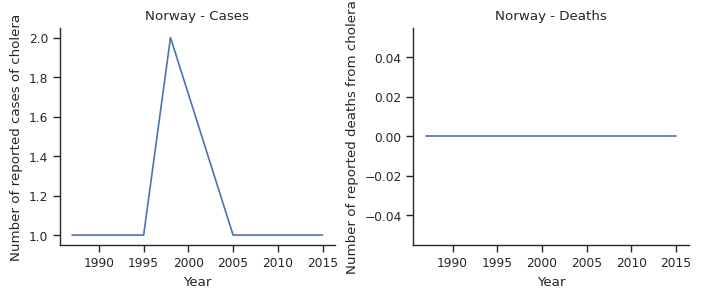

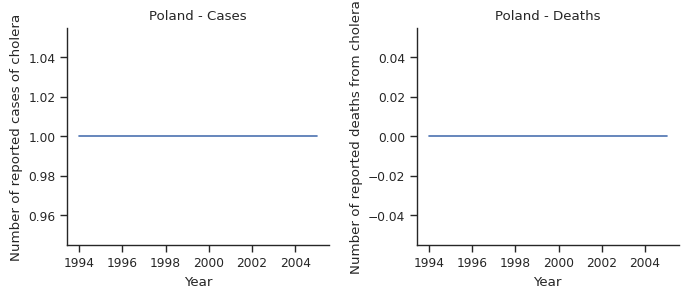

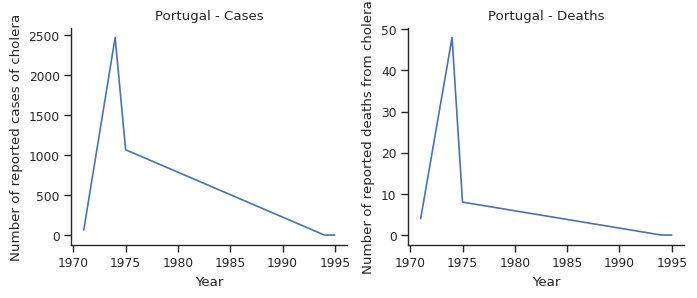

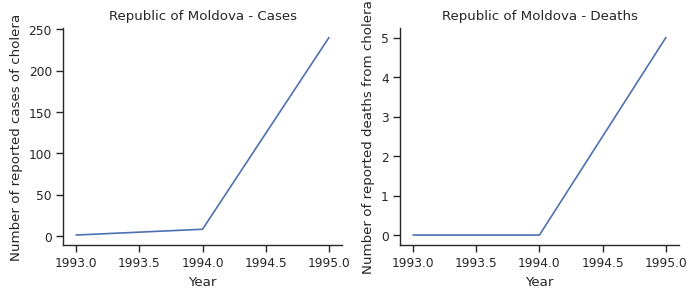

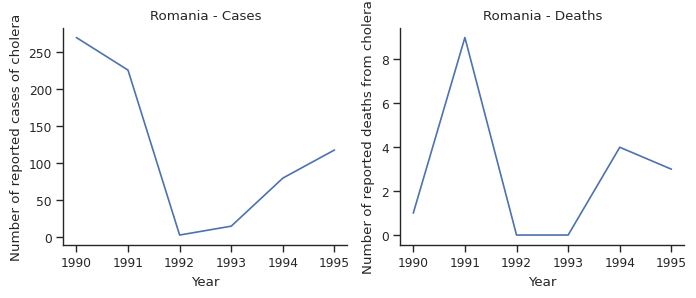

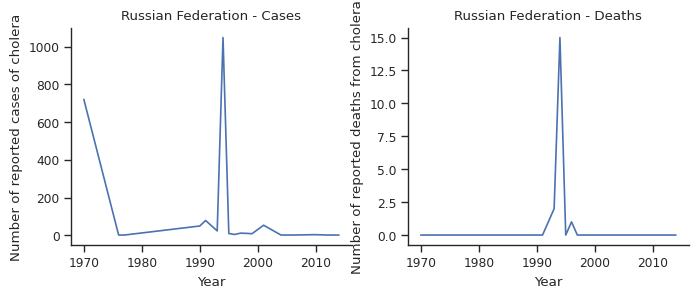

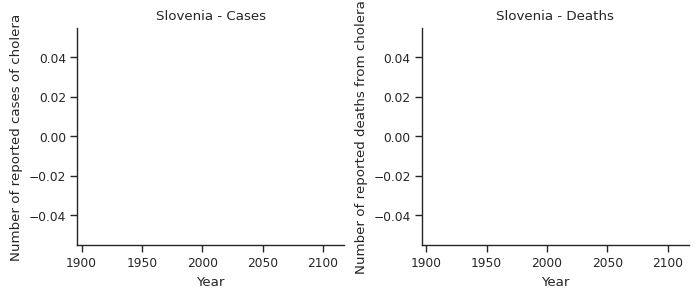

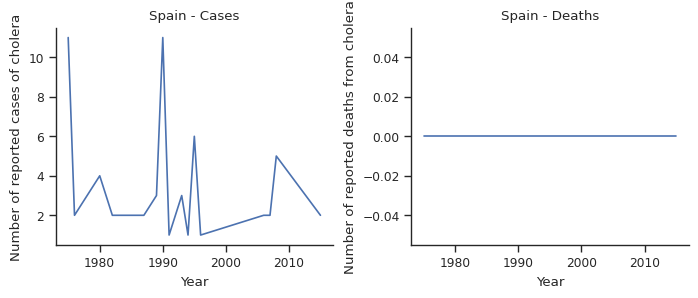

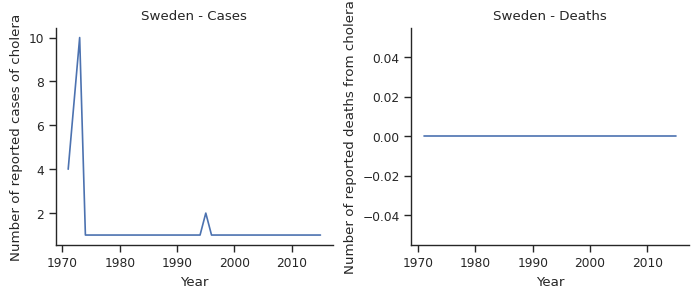

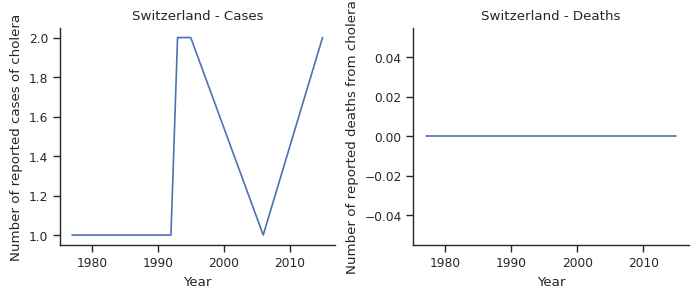

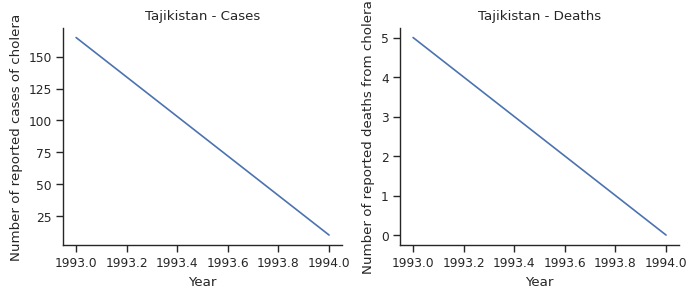

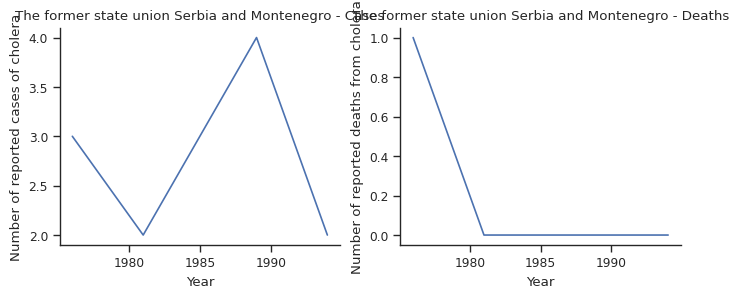

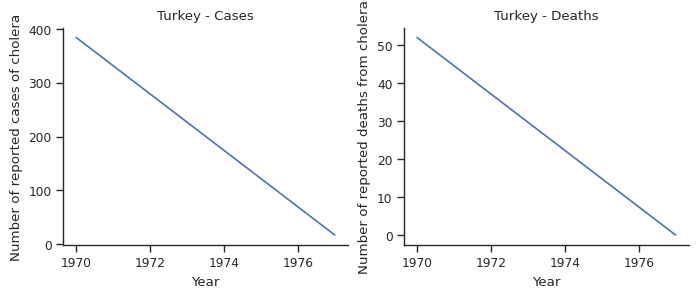

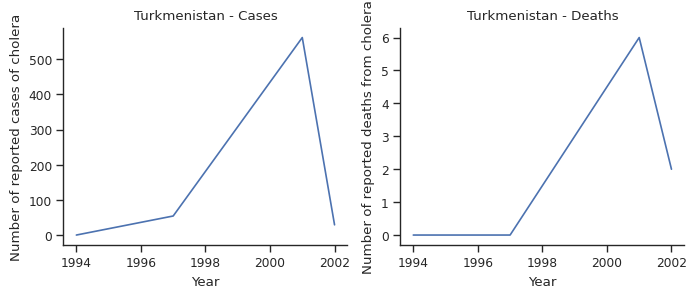

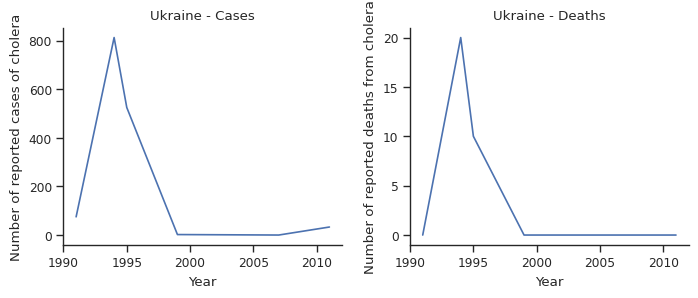

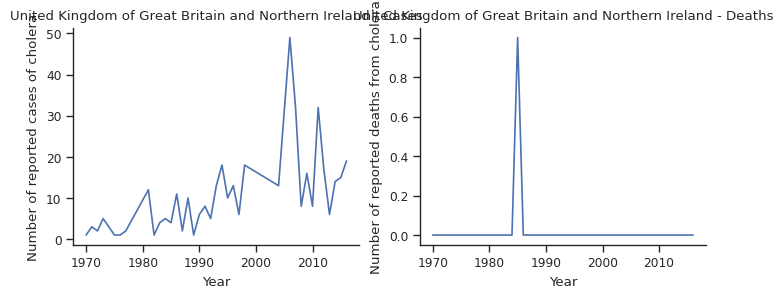

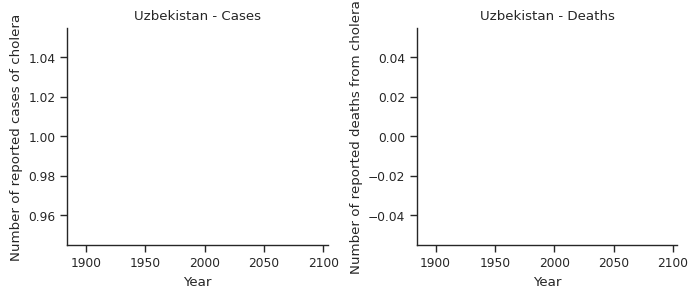

In [4]:
for i in data_europe['Country'].unique():

    fig, axes = plt.subplots(1, 2, figsize=(7,3))

    sns.lineplot(
        data=data_europe.loc[data['Country']==i],
        x='Year',
        y='Number of reported cases of cholera',
        ax=axes[0])

    axes[0].set(
        title=f'{i} - Cases'
    )

    sns.lineplot(
        data=data_europe.loc[data['Country']==i],
        x='Year',
        y='Number of reported deaths from cholera',
        ax=axes[1])
    
    axes[1].set(
        title=f'{i} - Deaths'
    )
    fig.tight_layout(pad=0.8)
    sns.despine()
    plt.show()

#### 3. Cases vs Deaths per country

In [5]:
for i in data_europe['Country'].unique():

    fig = px.bar(
    data_frame = data_europe.loc[data['Country']==i], 
    x='Year', 
    y='Number of reported cases of cholera', 
    width=1000, 
    color='Number of reported deaths from cholera',
    color_discrete_sequence ='viridis',
    title=f'{i} - Cases vs Deaths')

    fig.show()

#### 3. Correlation heatmap

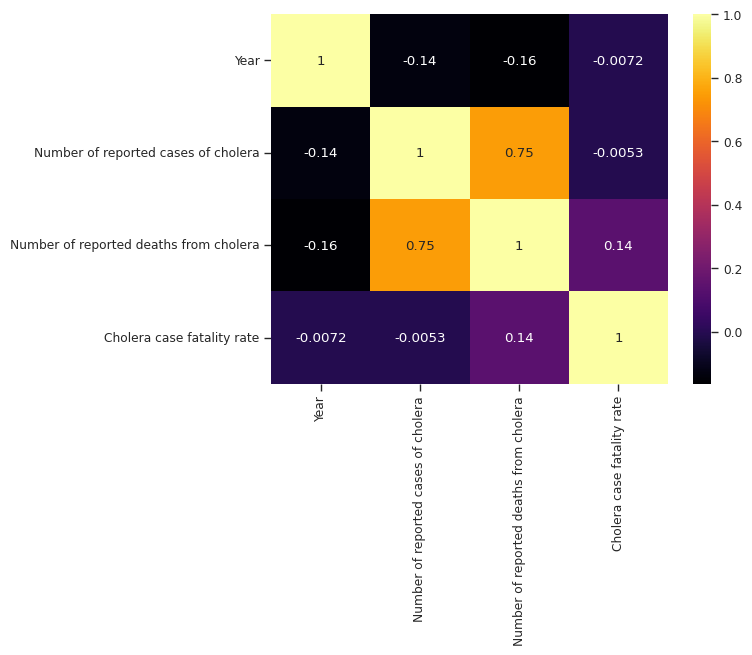

In [6]:
sns.heatmap(
    data=data_europe.corr(numeric_only=True),
    cmap='inferno',
    annot=True)

plt.show()

## Conclusions:

- We see an overall small number of cases and deaths. Yet, there are information lacking for several countries, such as Republic of Moldova, Slovenia, Azerbaijan, Turkey, and others. Most cases where informations are missing are from eastern european countries. Therefore, no further inferences can be done on european overall cholera status.
- Again, as expected, the number of cholera cases and the number of deaths are correlated.
